<a href="https://colab.research.google.com/github/SinghReena/MachineLearning/blob/master/Reena_Singh_Project_2_Machine_Learning_(Classification_Logistic_Regression%2CNaive_Bayes%2CkNN%2CSVM%2CLDA).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Breast Cancer Dataset

Data Set Information:

This is one of three domains provided by the Oncology Institute that has repeatedly appeared in the machine learning literature. (See also lymphography and primary-tumor.)

This data set includes 201 instances of one class and 85 instances of another class. The instances are described by 9 attributes, some of which are linear and some are nominal.

Attribute Information:

Class: no-recurrence-events, recurrence-events
age: 10-19, 20-29, 30-39, 40-49, 50-59, 60-69, 70-79, 80-89, 90-99.
menopause: lt40, ge40, premeno.
tumor-size: 0-4, 5-9, 10-14, 15-19, 20-24, 25-29, 30-34, 35-39, 40-44, 45-49, 50-54, 55-59.
inv-nodes: 0-2, 3-5, 6-8, 9-11, 12-14, 15-17, 18-20, 21-23, 24-26, 27-29, 30-32, 33-35, 36-39.
node-caps: yes, no.
deg-malig: 1, 2, 3.
breast: left, right.
breast-quad: left-up, left-low, right-up, right-low, central.
irradiat: yes, no.

In [ ]:
#@title Install the 0.24 version of scikit-learn
!pip uninstall scikit-learn -y

!pip install -U scikit-learn

Uninstalling scikit-learn-0.24.2:
  Successfully uninstalled scikit-learn-0.24.2
  Using cached https://files.pythonhosted.org/packages/a8/eb/a48f25c967526b66d5f1fa7a984594f0bf0a5afafa94a8c4dbc317744620/scikit_learn-0.24.2-cp37-cp37m-manylinux2010_x86_64.whl


In [ ]:
#@title Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.linear_model as linear_module

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving breast-cancer.data to breast-cancer (1).data


**Loading the breast-cancer Dataset from my computer**

I am loading it into a DataFrame with read_csv

In [ ]:
import io
bc_df = pd.read_csv(io.BytesIO(uploaded['breast-cancer.data']))
# Dataset is now stored in a Pandas Dataframe

print(bc_df)

     no-recurrence-events  30-39  premeno  30-34  ...  3   left   left_low no.1
0    no-recurrence-events  40-49  premeno  20-24  ...  2  right   right_up   no
1    no-recurrence-events  40-49  premeno  20-24  ...  2   left   left_low   no
2    no-recurrence-events  60-69     ge40  15-19  ...  2  right    left_up   no
3    no-recurrence-events  40-49  premeno    0-4  ...  2  right  right_low   no
4    no-recurrence-events  60-69     ge40  15-19  ...  2   left   left_low   no
..                    ...    ...      ...    ...  ... ..    ...        ...  ...
280     recurrence-events  30-39  premeno  30-34  ...  2   left    left_up   no
281     recurrence-events  30-39  premeno  20-24  ...  3   left    left_up  yes
282     recurrence-events  60-69     ge40  20-24  ...  1  right    left_up   no
283     recurrence-events  40-49     ge40  30-34  ...  3   left   left_low   no
284     recurrence-events  50-59     ge40  30-34  ...  3   left   left_low   no

[285 rows x 10 columns]


*Viewing some of the rows in the breast-cancer Dataset (Data Exploration)*

**To save space, I want to view the first five rows with DataFrame methods head**

In [ ]:
bc_df.head()

,no-recurrence-events,30-39,premeno,30-34,0-2,no,3,left,left_low,no.1
0,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,right_up,no
1,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,left,left_low,no
2,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,right,left_up,no
3,no-recurrence-events,40-49,premeno,0-4,0-2,no,2,right,right_low,no
4,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,left,left_low,no


**Attribute Information**


Attribute Information:

1. Class: no-recurrence-events, recurrence-events
2. age: 10-19, 20-29, 30-39, 40-49, 50-59, 60-69, 70-79, 80-89, 90-99.=9
3. menopause: lt40, ge40, premeno.=3
4. tumor-size: 0-4, 5-9, 10-14, 15-19, 20-24, 25-29, 30-34, 35-39, 40-44, 45-49, 50-54, 55-59.=12
5. inv-nodes: 0-2, 3-5, 6-8, 9-11, 12-14, 15-17, 18-20, 21-23, 24-26, 27-29, 30-32, 33-35, 36-39.=13
6. node-caps: yes, no.=2
7. deg-malig: 1, 2, 3.=3
8. breast: left, right.=2
9. breast-quad: left-up, left-low, right-up, right-low, central.=5
10. irradiat: yes, no.=2

*To save space, I want to view the last five rows with DataFrame method tail*

In [ ]:
bc_df.tail()

,classModel,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
280,recurrence-events,30-39,premeno,30-34,0-2,no,2,left,left_up,no
281,recurrence-events,30-39,premeno,20-24,0-2,no,3,left,left_up,yes
282,recurrence-events,60-69,ge40,20-24,0-2,no,1,right,left_up,no
283,recurrence-events,40-49,ge40,30-34,3-5,no,3,left,left_low,no
284,recurrence-events,50-59,ge40,30-34,3-5,no,3,left,left_low,no


In [ ]:
bc_df.columns

Index(['classModel', 'age', 'menopause', 'tumor-size', 'inv-nodes',
       'node-caps', 'deg-malig', 'breast', 'breast-quad', 'irradiat'],
      dtype='object')

In [ ]:
bc_df

,classModel,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
0,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,right_up,no
1,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,left,left_low,no
2,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,right,left_up,no
3,no-recurrence-events,40-49,premeno,0-4,0-2,no,2,right,right_low,no
4,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,left,left_low,no
...,...,...,...,...,...,...,...,...,...,...
280,recurrence-events,30-39,premeno,30-34,0-2,no,2,left,left_up,no
281,recurrence-events,30-39,premeno,20-24,0-2,no,3,left,left_up,yes
282,recurrence-events,60-69,ge40,20-24,0-2,no,1,right,left_up,no
283,recurrence-events,40-49,ge40,30-34,3-5,no,3,left,left_low,no


In [ ]:
bc_df.interpolate()

,classModel,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
0,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,right_up,no
1,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,left,left_low,no
2,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,right,left_up,no
3,no-recurrence-events,40-49,premeno,0-4,0-2,no,2,right,right_low,no
4,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,left,left_low,no
...,...,...,...,...,...,...,...,...,...,...
280,recurrence-events,30-39,premeno,30-34,0-2,no,2,left,left_up,no
281,recurrence-events,30-39,premeno,20-24,0-2,no,3,left,left_up,yes
282,recurrence-events,60-69,ge40,20-24,0-2,no,1,right,left_up,no
283,recurrence-events,40-49,ge40,30-34,3-5,no,3,left,left_low,no


In [ ]:
from sklearn.preprocessing import LabelEncoder

lb = LabelEncoder() 
bc_df['classModel'] = lb.fit_transform(bc_df['classModel'])
bc_df

,classModel,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
0,0,40-49,premeno,20-24,0-2,no,2,right,right_up,no
1,0,40-49,premeno,20-24,0-2,no,2,left,left_low,no
2,0,60-69,ge40,15-19,0-2,no,2,right,left_up,no
3,0,40-49,premeno,0-4,0-2,no,2,right,right_low,no
4,0,60-69,ge40,15-19,0-2,no,2,left,left_low,no
...,...,...,...,...,...,...,...,...,...,...
280,1,30-39,premeno,30-34,0-2,no,2,left,left_up,no
281,1,30-39,premeno,20-24,0-2,no,3,left,left_up,yes
282,1,60-69,ge40,20-24,0-2,no,1,right,left_up,no
283,1,40-49,ge40,30-34,3-5,no,3,left,left_low,no


In [ ]:
df=bc_df.values
df

array([[0, '40-49', 'premeno', ..., 'right', 'right_up', 'no'],
       [0, '40-49', 'premeno', ..., 'left', 'left_low', 'no'],
       [0, '60-69', 'ge40', ..., 'right', 'left_up', 'no'],
       ...,
       [1, '60-69', 'ge40', ..., 'right', 'left_up', 'no'],
       [1, '40-49', 'ge40', ..., 'left', 'left_low', 'no'],
       [1, '50-59', 'ge40', ..., 'left', 'left_low', 'no']], dtype=object)

In [ ]:
df[:,0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
      dtype=object)

In [ ]:
df[:,1:]

array([['40-49', 'premeno', '20-24', ..., 'right', 'right_up', 'no'],
       ['40-49', 'premeno', '20-24', ..., 'left', 'left_low', 'no'],
       ['60-69', 'ge40', '15-19', ..., 'right', 'left_up', 'no'],
       ...,
       ['60-69', 'ge40', '20-24', ..., 'right', 'left_up', 'no'],
       ['40-49', 'ge40', '30-34', ..., 'left', 'left_low', 'no'],
       ['50-59', 'ge40', '30-34', ..., 'left', 'left_low', 'no']],
      dtype=object)

In [ ]:
#Split dataset into input (X) and output (y) variables 

X = df[:,1:]
y = df[:,0]

In [ ]:
# Check X and y shape

print(X.shape, y.shape)

(285, 9) (285,)


In [ ]:
print("breast-cancer: rows:{} cols:{}".format(bc_df.shape[0], bc_df.shape[1]))

breast-cancer: rows:285 cols:10


**Check datatypes of all the columns**

In [ ]:
bc_df.dtypes

classModel      int64
age            object
menopause      object
tumor-size     object
inv-nodes      object
node-caps      object
deg-malig       int64
breast         object
breast-quad    object
irradiat       object
dtype: object

*That means most of the the columns values are string type except one.*

**know the information of data**

In [ ]:
bc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285 entries, 0 to 284
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   classModel   285 non-null    int64 
 1   age          285 non-null    object
 2   menopause    285 non-null    object
 3   tumor-size   285 non-null    object
 4   inv-nodes    285 non-null    object
 5   node-caps    285 non-null    object
 6   deg-malig    285 non-null    int64 
 7   breast       285 non-null    object
 8   breast-quad  285 non-null    object
 9   irradiat     285 non-null    object
dtypes: int64(2), object(8)
memory usage: 22.4+ KB


**Customizing the Column Names**

*clean up by setting the column names*

In [ ]:
bc_df.columns=['classModel','age','menopause','tumor-size','inv-nodes','node-caps','deg-malig','breast','breast-quad','irradiat']

In [ ]:
bc_df.head()

,classModel,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
0,0,40-49,premeno,20-24,0-2,no,2,right,right_up,no
1,0,40-49,premeno,20-24,0-2,no,2,left,left_low,no
2,0,60-69,ge40,15-19,0-2,no,2,right,left_up,no
3,0,40-49,premeno,0-4,0-2,no,2,right,right_low,no
4,0,60-69,ge40,15-19,0-2,no,2,left,left_low,no


**Checking if there are missing data, unlabeled data or data that is inconsistently labeled.**

*missing data*

In [ ]:
def missing_data(t_data):
    tot = t_data.isnull().sum().sort_values()
    per = (t_data.isnull().sum()/t_data.isnull().count()*100).sort_values()
    return pd.concat([tot, per], axis=1, keys=['Total', 'Percentage'])
missing_data(bc_df)

,Total,Percentage
classModel,0,0.0
age,0,0.0
menopause,0,0.0
tumor-size,0,0.0
inv-nodes,0,0.0
node-caps,0,0.0
deg-malig,0,0.0
breast,0,0.0
breast-quad,0,0.0
irradiat,0,0.0


*You can see at first sight that there are no missings for any columns in the data set.*

In [ ]:
bc_df.shape

(285, 10)

**First visualization**

*First let us visualize to understand correlation.*

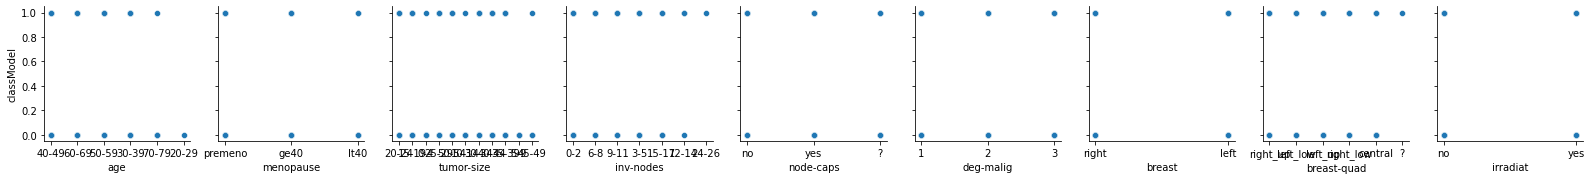

In [ ]:
sns.pairplot(bc_df, y_vars="classModel", x_vars=[ 'age', 'menopause', 'tumor-size', 'inv-nodes', 'node-caps', 'deg-malig',
       'breast', 'breast-quad','irradiat'])

In [ ]:
bc_df.columns = ['classModel','age', 'menopause', 'tumor-size', 'inv-nodes', 'node-caps', 'deg-malig',
       'breast', 'breast-quad','irradiat']
bc_df


,classModel,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
0,0,40-49,premeno,20-24,0-2,no,2,right,right_up,no
1,0,40-49,premeno,20-24,0-2,no,2,left,left_low,no
2,0,60-69,ge40,15-19,0-2,no,2,right,left_up,no
3,0,40-49,premeno,0-4,0-2,no,2,right,right_low,no
4,0,60-69,ge40,15-19,0-2,no,2,left,left_low,no
...,...,...,...,...,...,...,...,...,...,...
280,1,30-39,premeno,30-34,0-2,no,2,left,left_up,no
281,1,30-39,premeno,20-24,0-2,no,3,left,left_up,yes
282,1,60-69,ge40,20-24,0-2,no,1,right,left_up,no
283,1,40-49,ge40,30-34,3-5,no,3,left,left_low,no


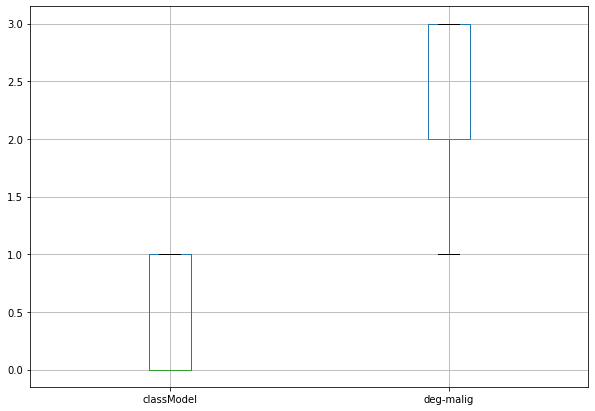

In [ ]:
plt.figure(figsize =(10,7))
bc_df.boxplot()

<string>:6: UserWarning: Warning: converting a masked element to nan.
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


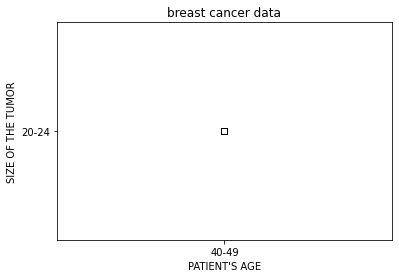

In [ ]:
my_colors = {'no-recurrence-events': 'green', 'recurrence-events': 'red'}
color_series = bc_df["classModel"].map(my_colors)
x1 = bc_df["age"]
y1 = bc_df["tumor-size"]
plt.xlabel("PATIENT'S AGE")
plt.ylabel("SIZE OF THE TUMOR")
plt.title("breast cancer data")
plt.yticks(ticks=np.arange(0, 59,1))


plt.scatter(x1,y1, c = color_series, marker="s", edgecolors="black")

**Selecting all the 9 variables that seem to explain the variability the most.**

At the beginning I selected 'age', 'tumor-size','inv-nodes','deg-malig'and 'irradiat' seem to explain the variability in the response variable 'class' the most.According to Sai's suggestion,later I selected all of them.

**Spliting into training and test**

In [ ]:
# Split X and Y into training and test subsets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

**One-hot Encoding**

In [ ]:
# using OneHotEncoder for train (predictor) data

ohe = OneHotEncoder(handle_unknown='ignore')
ohe.fit(X_train)
X_train_enc = ohe.transform(X_train)
X_test_enc = ohe.transform(X_test)
print('Train X and Test X', X_train_enc, X_test_enc)

Train X and Test X   (0, 2)	1.0
  (0, 5)	1.0
  (0, 15)	1.0
  (0, 19)	1.0
  (0, 27)	1.0
  (0, 30)	1.0
  (0, 32)	1.0
  (0, 35)	1.0
  (0, 39)	1.0
  (1, 3)	1.0
  (1, 6)	1.0
  (1, 13)	1.0
  (1, 19)	1.0
  (1, 27)	1.0
  (1, 29)	1.0
  (1, 32)	1.0
  (1, 35)	1.0
  (1, 39)	1.0
  (2, 1)	1.0
  (2, 7)	1.0
  (2, 12)	1.0
  (2, 19)	1.0
  (2, 27)	1.0
  (2, 29)	1.0
  (2, 33)	1.0
  :	:
  (210, 10)	1.0
  (210, 19)	1.0
  (210, 27)	1.0
  (210, 30)	1.0
  (210, 33)	1.0
  (210, 37)	1.0
  (210, 39)	1.0
  (211, 1)	1.0
  (211, 7)	1.0
  (211, 12)	1.0
  (211, 19)	1.0
  (211, 27)	1.0
  (211, 30)	1.0
  (211, 33)	1.0
  (211, 35)	1.0
  (211, 39)	1.0
  (212, 1)	1.0
  (212, 7)	1.0
  (212, 9)	1.0
  (212, 19)	1.0
  (212, 27)	1.0
  (212, 30)	1.0
  (212, 32)	1.0
  (212, 35)	1.0
  (212, 39)	1.0   (0, 3)	1.0
  (0, 5)	1.0
  (0, 13)	1.0
  (0, 19)	1.0
  (0, 27)	1.0
  (0, 30)	1.0
  (0, 32)	1.0
  (0, 36)	1.0
  (0, 39)	1.0
  (1, 2)	1.0
  (1, 5)	1.0
  (1, 10)	1.0
  (1, 19)	1.0
  (1, 27)	1.0
  (1, 29)	1.0
  (1, 33)	1.0
  (1, 34)	1.0
  

In [ ]:
# using LabelEncoder for target (output) variable

le = LabelEncoder()
le.fit(y_train)
y_train_enc = le.transform(y_train)
y_test_enc = le.transform(y_test)
print('Train y and Test y', y_train_enc, y_test_enc)

Train y and Test y [0 0 0 0 0 0 1 1 1 0 1 0 1 1 0 1 1 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0
 0 0 1 0 0 0 1 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 1 0 0 0 0 1 1 0
 0 0 1 1 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 1 0 0 1 1 0 0 1 0 0 0 0 1 0
 1 0 0 1 1 1 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 1 0 0 1 0 1 1 0 0 1 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0
 0 0 1 1 1 0 0 0 0 0 1 1 0 0 0 1 1 0 1 0 0 0 0 1 1 0 1 0] [0 0 0 1 1 1 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0
 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 1 0 0 1 0 0 1 1]


**Model-1 Logistic Regression**

In [ ]:
# Logistic Regression Classification Model

from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing

model = LogisticRegression()


model.fit(X_train_enc, y_train_enc)

# make predictions
expected = y_test_enc
predicted = model.predict(X_test_enc)

# summarize the fit of the model
print(metrics.classification_report(expected, predicted))
cm_L = metrics.confusion_matrix(expected, predicted)
print("Confusion matrix: \n", cm_L)

              precision    recall  f1-score   support

           0       0.78      0.88      0.83        52
           1       0.54      0.35      0.42        20

    accuracy                           0.74        72
   macro avg       0.66      0.62      0.63        72
weighted avg       0.71      0.74      0.72        72

Confusion matrix: 
 [[46  6]
 [13  7]]


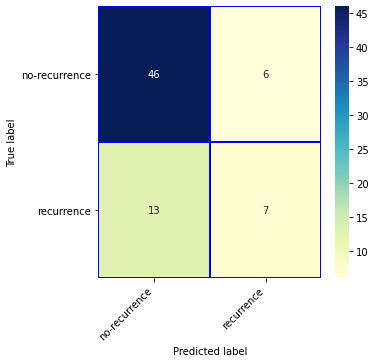

In [ ]:
# Plotting Logistic Regression Classification Model Confusion Matrix

def plot_cm(cm):   
    species = ['no-recurrence', 'recurrence']
    df_cm = pd.DataFrame(cm, index=species, columns=species)
    fig = plt.figure(figsize=(5,5))
    heatmap = sns.heatmap(df_cm, annot=True, fmt="d",cmap="YlGnBu",linecolor="blue",linewidths=1.0)
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=10)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=10)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

plot_cm(cm_L)


In this model we get 46 True Positives and 6 True Negatives
Based on the domain of the dataset, we will pay close attention to the bottom left quadrant
This quadrant shows False Negatives (when event ocurred (i.e. recurrence-event), however it was predicted as "non-recurence-event")
 Why is this quadrant important? Because it is dangerous to predict "no-cancer", when the patient might have cancer.
 We can also see in the output above that recall for 1 is 0.35

In all the models I will be looking at True postives and False Negatives (bottom left quadrant) to evaluate the model

**Logistic Regression- Calculation of the Accuracy of the model**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score
from numpy import mean
from numpy import std 

# define the model
model = LogisticRegression()
# fit on the training set
model.fit(X_train_enc, y_train_enc)
# predict on test set
yhat = model.predict(X_test_enc)
# evaluate predictions
accuracy = accuracy_score(y_test_enc, yhat)
print('Accuracy: %.2f' % (accuracy*100))


Accuracy: 73.61


**Model-2 Naive Bayes Classification Model**

              precision    recall  f1-score   support

           0       0.75      0.17      0.28        52
           1       0.28      0.85      0.42        20

    accuracy                           0.36        72
   macro avg       0.52      0.51      0.35        72
weighted avg       0.62      0.36      0.32        72

[[ 9 43]
 [ 3 17]]


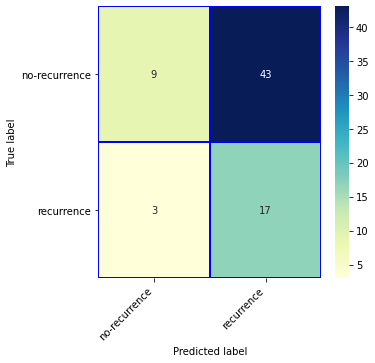

In [ ]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()

model.fit(X_train_enc.toarray(), y_train_enc)

# make predictions
expected = y_test_enc
predicted = model.predict(X_test_enc.toarray())

# summarize the fit of the model
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))
cm = metrics.confusion_matrix(expected, predicted)
plot_cm(cm)

**Naive Bayes Classification Model - Calculation of the accuracy of the model **

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score
from scipy.sparse import hstack
from numpy import mean
from numpy import std 

# define the model
model = GaussianNB()
# fit on the training set
model.fit(X_train_enc.toarray(), y_train_enc)

# predict on test set
yhat = model.predict(X_test_enc.toarray())
# evaluate predictions
accuracy = accuracy_score(y_test_enc, yhat)
print('Accuracy: %.2f' % (accuracy*100))


Accuracy: 36.11


In this model we get 9 True Positives and 43 True Negatives Based on the domain of the dataset. we will pay close attention to the bottom left quadrant This quadrant shows False Negatives (when event ocurred (i.e. recurrence-event), however it was predicted as "non-recurence-event") . We can also see in the output above that recall for 1 is 0.85

In all the models I will be looking at True postives and False Negatives (bottom left quadrant) to evaluate the model




**Model-3   Knn (k-Nearest Neighbor) - classification Model**


              precision    recall  f1-score   support

           0       0.82      0.94      0.87        52
           1       0.75      0.45      0.56        20

    accuracy                           0.81        72
   macro avg       0.78      0.70      0.72        72
weighted avg       0.80      0.81      0.79        72

[[49  3]
 [11  9]]


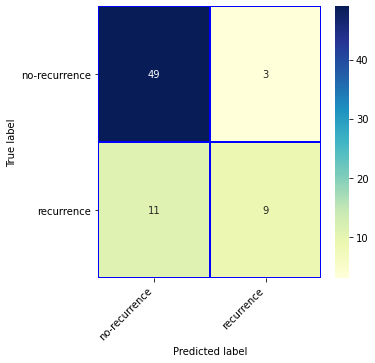

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train_enc, y_train_enc)

# make predictions
expected = y_test_enc
predicted = model.predict(X_test_enc)

# summarize the fit of the model
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))
cm = metrics.confusion_matrix(expected, predicted)
plot_cm(cm)


This is the first model where we see the recall number go down to 10
The recall for 1 is 0.45
In this model the True Positives are also the highest we've seen so far at 49 

**(k-Nearest Neighbor) - classification Model-Calculation of the accuracy of the model**



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score
from numpy import mean
from numpy import std 

# define the model
model = KNeighborsClassifier(n_neighbors=3)
# fit on the training set
model.fit(X_train_enc, y_train_enc)
# predict on test set
yhat = model.predict(X_test_enc)
# evaluate predictions
accuracy = accuracy_score(y_test_enc, yhat)
print('Accuracy: %.2f' % (accuracy*100))


Accuracy: 80.56


**Model - 4 SVM (Support Vector Machines) Classification Model**

              precision    recall  f1-score   support

           0       0.78      1.00      0.87        52
           1       1.00      0.25      0.40        20

    accuracy                           0.79        72
   macro avg       0.89      0.62      0.64        72
weighted avg       0.84      0.79      0.74        72

[[52  0]
 [15  5]]


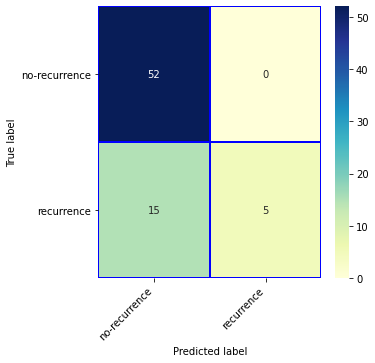

In [ ]:
from sklearn import svm

def fit_and_results(model):
  model.fit(X_train_enc, y_train_enc)

  # make predictions
  expected = y_test_enc
  predicted = model.predict(X_test_enc)

  # summarize the fit of the model
  print(metrics.classification_report(expected, predicted))
  print(metrics.confusion_matrix(expected, predicted))
  cm = metrics.confusion_matrix(expected, predicted)
  plot_cm(cm)

from sklearn import svm

fit_and_results(svm.SVC())

SVM model is interesting. At first sight it offers higher precision on 1

Using this model we would miss a lot of recurrence-events (i.e. we would identify patient as a cancer-free, when in reality patient has cancer)

**Support Vector Machine - Calculation of the Accuracy of the model**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score
from numpy import mean
from numpy import std 

# define the model
model = svm.SVC()
# fit on the training set
model.fit(X_train_enc, y_train_enc)
# predict on test set
yhat = model.predict(X_test_enc)
# evaluate predictions
accuracy = accuracy_score(y_test_enc, yhat)
print('Accuracy: %.2f' % (accuracy*100))


Accuracy: 79.17


**Model-5 LDA (Linear Descriminant Analysis) Classification Model**


              precision    recall  f1-score   support

           0       0.78      0.83      0.80        52
           1       0.47      0.40      0.43        20

    accuracy                           0.71        72
   macro avg       0.63      0.61      0.62        72
weighted avg       0.70      0.71      0.70        72

[[43  9]
 [12  8]]


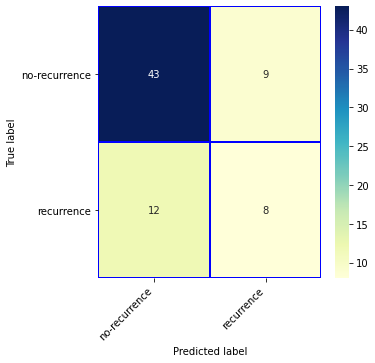

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, roc_curve, roc_auc_score, f1_score


from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
model  = LinearDiscriminantAnalysis()
model.fit(X_train_enc.toarray(), y_train_enc)

# make predictions
expected = y_test_enc
predicted = model.predict(X_test_enc)

# summarize the fit of the model
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))
cm = metrics.confusion_matrix(expected, predicted)
plot_cm(cm)

**LDA (Linear Descriminant Analysis) Classification Model- Calculation of the Accuracy of the model**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, roc_curve, roc_auc_score, f1_score


from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score
from numpy import mean
from numpy import std 

# define the model
model  = LinearDiscriminantAnalysis()
# fit on the training set
model.fit(X_train_enc.toarray(), y_train_enc)

# predict on test set
yhat = model.predict(X_test_enc)
# evaluate predictions
accuracy = accuracy_score(y_test_enc, yhat)
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 70.83


**One hot Encoding - Practice all the methods **

In [ ]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np

enc = OneHotEncoder()

classModel_enc = enc.fit_transform(bc_df[['classModel']]) 

age_enc = enc.fit_transform(bc_df[['age']])
menopause_enc = enc.fit_transform(bc_df[['menopause']])
tumorsize_enc = enc.fit_transform(bc_df[['tumor-size']])
invnodes_enc = enc.fit_transform(bc_df[['inv-nodes']])
nodecaps_enc = enc.fit_transform(bc_df[['node-caps']])
degmalig_enc = enc.fit_transform(bc_df[['deg-malig']])
breast_enc = enc.fit_transform(bc_df[['breast']])
breastquad_enc = enc.fit_transform(bc_df[['breast-quad']])
irradiat_enc = enc.fit_transform(bc_df[['irradiat']])

In [ ]:
enc.fit_transform(bc_df)

<285x45 sparse matrix of type '<class 'numpy.float64'>'
	with 2850 stored elements in Compressed Sparse Row format>

First attempt at merging. Use the merge methods at csr_matrix.

In [ ]:
type(age_enc)

scipy.sparse.csr.csr_matrix

In [ ]:
from scipy.sparse import hstack
hstack([classModel_enc,age_enc,menopause_enc, tumorsize_enc,invnodes_enc,nodecaps_enc,degmalig_enc,breast_enc,breastquad_enc,irradiat_enc])

<285x45 sparse matrix of type '<class 'numpy.float64'>'
	with 2850 stored elements in COOrdinate format>

**Second method: convert to dataframe**

In [ ]:
classModel_df = pd.DataFrame.sparse.from_spmatrix(classModel_enc)
age_df = pd.DataFrame.sparse.from_spmatrix(age_enc)
menopause_df = pd.DataFrame.sparse.from_spmatrix(menopause_enc)
tumorsize_df = pd.DataFrame.sparse.from_spmatrix(tumorsize_enc)
invnodes_df = pd.DataFrame.sparse.from_spmatrix(invnodes_enc)
nodecaps_df = pd.DataFrame.sparse.from_spmatrix(nodecaps_enc)
degmalig_df = pd.DataFrame.sparse.from_spmatrix(degmalig_enc)
breast_df = pd.DataFrame.sparse.from_spmatrix(breast_enc)
breastquad_df = pd.DataFrame.sparse.from_spmatrix(breastquad_enc)
irradiat_df = pd.DataFrame.sparse.from_spmatrix(irradiat_enc)

classModel_df.shape,age_df.shape,menopause_df, tumorsize_df.shape, invnodes_df.shape, nodecaps_df.shape, degmalig_df.shape,breast_df.shape,breastquad_df.shape,irradiat_df.shape

((285, 2), (285, 6),        0    1    2
 0    0.0  0.0  1.0
 1    0.0  0.0  1.0
 2    1.0  0.0  0.0
 3    0.0  0.0  1.0
 4    1.0  0.0  0.0
 ..   ...  ...  ...
 280  0.0  0.0  1.0
 281  0.0  0.0  1.0
 282  1.0  0.0  0.0
 283  1.0  0.0  0.0
 284  1.0  0.0  0.0
 
 [285 rows x 3 columns], (285, 11), (285, 7), (285, 3), (285, 3), (285,
  2), (285, 6), (285, 2))

In [ ]:
new_df=pd.concat([ classModel_df,age_df, menopause_df,tumorsize_df, invnodes_df,nodecaps_df,degmalig_df,breast_df,breastquad_df,irradiat_df], axis = 1)



In [ ]:
new_df

,0,1,0,1,2,3,4,5,0,1,2,0,1,2,3,4,5,6,7,8,9,10,0,1,2,3,4,5,6,0,1,2,0,1,2,0,1,0,1,2,3,4,5,0,1
0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
280,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
281,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
282,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
283,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


## Third way: use column transformer utility from scikit

In [ ]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(handle_unknown='ignore', sparse=True)

data_enc=enc.fit_transform(bc_df[['classModel','age','menopause', 'tumor-size','inv-nodes','node-caps','deg-malig','breast','breast-quad','irradiat']])
data_enc

<285x45 sparse matrix of type '<class 'numpy.float64'>'
	with 2850 stored elements in Compressed Sparse Row format>

In [ ]:
enc.fit_transform(bc_df[['classModel','age','menopause', 'tumor-size','inv-nodes','node-caps','deg-malig','breast','breast-quad','irradiat']])

<285x45 sparse matrix of type '<class 'numpy.float64'>'
	with 2850 stored elements in Compressed Sparse Row format>

In [ ]:

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from scipy.sparse import hstack
import numpy as np



ohe = OneHotEncoder()


#ct = make_column_transformer(
    #(ohe, ['age','menopause', 'tumor-size','inv-nodes','node-caps','deg-malig','breast','breast-quad','irradiat']),
   # ('passthrough', []) )

#After the Sai's guidance I did
ct = make_column_transformer(
    (ohe, ['age','menopause', 'tumor-size','inv-nodes','node-caps','deg-malig','breast','breast-quad','irradiat']),
     )
X = ct.fit_transform(bc_df)

pd.DataFrame.sparse.from_spmatrix(X)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
280,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
281,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
282,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
283,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
from sklearn.preprocessing import LabelEncoder

lb = LabelEncoder() 
bc_df['classModel'] = lb.fit_transform(bc_df['classModel'])
bc_df

,classModel,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
0,0,40-49,premeno,20-24,0-2,no,2,right,right_up,no
1,0,40-49,premeno,20-24,0-2,no,2,left,left_low,no
2,0,60-69,ge40,15-19,0-2,no,2,right,left_up,no
3,0,40-49,premeno,0-4,0-2,no,2,right,right_low,no
4,0,60-69,ge40,15-19,0-2,no,2,left,left_low,no
...,...,...,...,...,...,...,...,...,...,...
280,1,30-39,premeno,30-34,0-2,no,2,left,left_up,no
281,1,30-39,premeno,20-24,0-2,no,3,left,left_up,yes
282,1,60-69,ge40,20-24,0-2,no,1,right,left_up,no
283,1,40-49,ge40,30-34,3-5,no,3,left,left_low,no


In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
from scipy.sparse import hstack
import numpy as np

Y = bc_df[['classModel']]
ct = make_column_transformer(
    (ohe, ['age','menopause', 'tumor-size','inv-nodes','node-caps','deg-malig','breast','breast-quad','irradiat']),
     )
X = ct.fit_transform(bc_df)

In [ ]:
bc_df

,classModel,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
0,0,40-49,premeno,20-24,0-2,no,2,right,right_up,no
1,0,40-49,premeno,20-24,0-2,no,2,left,left_low,no
2,0,60-69,ge40,15-19,0-2,no,2,right,left_up,no
3,0,40-49,premeno,0-4,0-2,no,2,right,right_low,no
4,0,60-69,ge40,15-19,0-2,no,2,left,left_low,no
...,...,...,...,...,...,...,...,...,...,...
280,1,30-39,premeno,30-34,0-2,no,2,left,left_up,no
281,1,30-39,premeno,20-24,0-2,no,3,left,left_up,yes
282,1,60-69,ge40,20-24,0-2,no,1,right,left_up,no
283,1,40-49,ge40,30-34,3-5,no,3,left,left_low,no


In [ ]:
new_df

,0,1,0,1,2,3,4,5,0,1,2,0,1,2,3,4,5,6,7,8,9,10,0,1,2,3,4,5,6,0,1,2,0,1,2,0,1,0,1,2,3,4,5,0,1
0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
280,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
281,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
282,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
283,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


**Conclusions:**

In recent years, several studies have applied classification models on different medical datasets to classify Breast Cancer. These algorithms show good classification results and encourage many researchers to apply these kind of models to solve challenging tasks. In recent years, several studies have applied data mining algorithms on different medical datasets to classify Breast Cancer. These algorithms show good classification results and encourage many researchers to apply these kind of algorithms to solve challenging tasks.

Prediction of breast cancer recurrence , I have used Logistic Regression, Naive Bayes, kNN, SVM and finally LDA.

The accuracy of the different model is as follows:-

Logistic Regression -73.61%

Naive Bayes - 36.11%

kNN - 80.56%

SVM - 79.17%

LDA - 70.83%

From the above observations:-

I decided that the k-Nearest Neighbor model is the best model because of the high accuracy among all of them.And the second best model is SVM whose accuracy is 79.17%.

Thanks!!


